In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow_addons.layers import InstanceNormalization
from PIL import Image
from tensorflow.keras.layers import Conv2D, LSTM, Dense, Flatten, Dropout, MaxPooling2D, Activation, TimeDistributed,BatchNormalization

In [74]:
# Change the directory of the raw dataset
np.random.seed(6)
data_dir = 'desktop/selected_artist'
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,      # normalize pixel values between 0 to 1
    validation_split=0.1
)

# use the flow_from_directory method to import the images from the directories
train_data = train_datagen.flow_from_directory(
    data_dir, # directory containing training images
    target_size=(224, 224),
    batch_size=batch_size,  # batch size for training data
    class_mode='categorical', # type of classification problem
    subset="training",
)

val_data = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=train_data.target_size,
    classes=list(train_data.class_indices.keys()),
    class_mode=train_data.class_mode,
    batch_size=train_data.batch_size,
    shuffle=train_data.shuffle,
    subset='validation'
)

# Visualize the data into matrix and one-hot encoding

# Extract one batch of the data
# X_train, y_train = next(train_data)

# Extract all batches of the data
X_train = []
y_train = []
for i in range(len(train_data)):
    batch = next(train_data)
    X_train.append(batch[0])
    y_train.append(batch[1])

X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

# Extract all batches of the data
X_val = []
y_val = []
for i in range(len(val_data)):
    batch = next(val_data)
    X_val.append(batch[0])
    y_val.append(batch[1])

X_val = np.concatenate(X_val)
y_val = np.concatenate(y_val)

print(X_train.shape)

Found 1790 images belonging to 8 classes.
Found 193 images belonging to 8 classes.
(1790, 224, 224, 3)


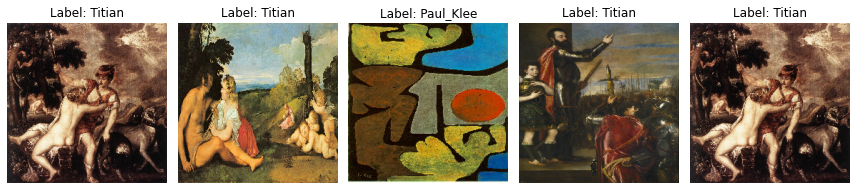

In [41]:
class_names = list(train_data.class_indices.keys())

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))

for i in range(5):
    index = np.random.randint(batch_size)
    image = train_data[0][0][index]
    label_index = np.argmax(train_data[0][1][index])
    label = class_names[label_index]
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LSTM, Dense, Flatten, Dropout, MaxPooling2D, Activation, TimeDistributed,BatchNormalization
import numpy as np
from tensorflow_addons.layers import InstanceNormalization

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape=(224, 224, 3)))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), padding = 'same'))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(64))
model.add(Dense(8, activation='softmax')) # Number of classes

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 instance_normalization_20 (  (None, 224, 224, 32)     64        
 InstanceNormalization)                                          
                                                                 
 activation_24 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 instance_normalization_21 (  (None, 112, 112, 64)    

In [43]:
model.save('cnn-lstm-1.model')

INFO:tensorflow:Assets written to: cnn-lstm-1.model/assets


INFO:tensorflow:Assets written to: cnn-lstm-1.model/assets


In [44]:
# Change the directory of the raw dataset
np.random.seed(6)
data_dir = 'desktop/test'
batch_size = 32

test_datagen = ImageDataGenerator(
    rescale=1./255,      # normalize pixel values between 0 to 1
)

# use the flow_from_directory method to import the images from the directories
test_data = test_datagen.flow_from_directory(
    data_dir, # directory containing training images
    batch_size = batch_size,
    classes=class_names,
    target_size=(224, 224),
    class_mode='categorical',
)


# Extract all batches of the data
X_test = []
y_test = []
for i in range(len(test_data)):
    batch = next(test_data)
    X_test.append(batch[0])
    y_test.append(batch[1])

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

print(X_test.shape)

Found 16 images belonging to 8 classes.
(16, 224, 224, 3)


1/1 [==============================] - 0s 356ms/step
F1-score: 0.533


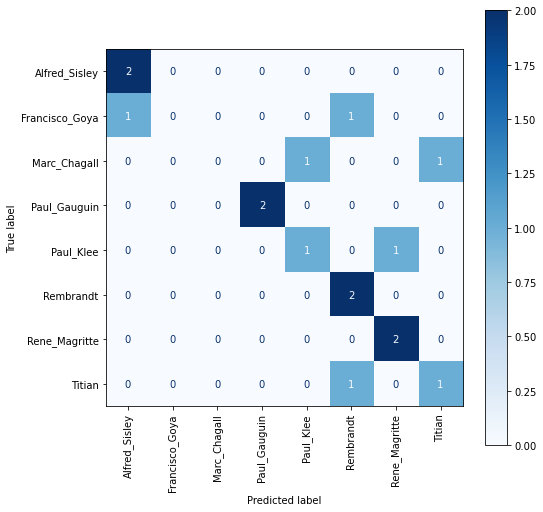

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_test),axis=1)
y_true = np.argmax(y_test,axis=1)

y_pred_labels = list(map(lambda x: class_names[x], y_pred))
y_true_labels = list(map(lambda x: class_names[x], y_true))

cm = confusion_matrix(y_true_labels, y_pred_labels)

f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print("F1-score: {:.3f}".format(f1))

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.show()